Introduction
Mumbai is the financial capital of India and is one of the most densely populated cities in the world. It lies on the west coast of India and attracts heavy tourism from all over the globe every year. Personally, I have been brought up in Mumbai and have loved the city from the bottom of my heart. It is one of the major hubs of the world and is extremely diverse with people from various ethnicities residing here. The multi-cultural nature of the city of Mumbai has brought along with it numerous cuisines from all over the world. The people of India generally love food and I personally love to try different cuisines and experience different flavors. Thus, the aim of this project is to study the neighborhoods in Mumbai to determine possible locations for opening a restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Mumbai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders.

Data Collection
The data required for this project has been collected from multiple sources. A summary of the data required for this project is given below.

Neighborhoods Data
The data of the neighborhoods in Mumbai was scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai. The data is read into a pandas data frame using the read_html() method. The main reason for doing so is that the Wikipedia page provides a comprehensive and detailed table of the data which can easily be scraped using the read_html() method of pandas.

Geographical Coordinates
The geographical coordinates for Mumbai data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Mumbai using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Mumbai. The coordinates of all neighborhoods in Mumbai are used to check the accuracy of coordinates given on Wikipedia and replace them in our data frame if the absolute difference is more than 0.001. These coordinates are then further used for plotting using the Folium library in python.

Venue Data
The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Mumbai and is used to study the popular venues of different neighborhoods.

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 5.9 MB/s eta 0:00:00


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

All libraries imported.


Data Retrieval
Scraping data from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai and reading it into a dataframe.

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,Chakala,"Andheri,Western Suburbs",19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


Data Wrangling
Lets look at the different values for Location present in the Location column.

In [3]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             9
Eastern Suburbs                     4
Western Suburbs                     4
Bandra,Western Suburbs              3
Kandivali West,Western Suburbs      3
Powai,Eastern Suburbs               3
Mira-Bhayandar,Western Suburbs      3
Ghatkopar,Eastern Suburbs           3
Kalbadevi,South Mumbai              2
Harbour Suburbs                     2
Mumbai                              2
Malad,Western Suburbs               2
Khar,Western Suburbs                2
Borivali (West),Western Suburbs     2
Goregaon,Western Suburbs            2
Vile Parle,Western Suburbs          1
Colaba,South Mumbai                 1
Tardeo,South Mumbai                 1
Kamathipura,South Mumbai            1
Fort,South Mumbai                   1
Dadar,South Mumbai                  1
Antop Hill,South Mumbai             1
Byculla,South Mumbai                1
Sanctacruz,Western Suburbs          1
Trombay,Harbour Suburbs             1
Govandi,Harb

We can see that there are many locations that appear only once or twice. This is because the main locations like "Western Suburbs" or "South Mumbai" 
are being further divided by the area within these locations. Lets clean the Location column to make it easier to understand.

In [4]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,Chakala,Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [5]:
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    33
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

In [6]:
df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,Chakala,Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
85,Parel,South Mumbai,18.990000,72.840000
86,Gowalia Tank,South Mumbai,18.962450,72.809703
87,Dava Bazaar,South Mumbai,18.946882,72.831362
88,Dharavi,Mumbai,19.040208,72.850850


Although the data we gathered contained latitude and longitude information, we can reconfirm these coordinates using Geocoder.

In [8]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Amboli,Western Suburbs,19.129300,72.843400,19.12906,72.84644
1,Chakala,Western Suburbs,19.111388,72.860833,19.10836,72.86233
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.12505,72.83248
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.12638,72.8242
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.14321,72.82497
5,Marol,Western Suburbs,19.119219,72.882743,19.11905,72.88281
6,Sahar,Western Suburbs,19.098889,72.867222,19.104635,72.86138
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.12858,72.82141
8,Versova,Western Suburbs,19.120000,72.820000,19.13769,72.81348
9,Mira Road,Western Suburbs,19.284167,72.871111,19.26461,72.870989


In [9]:
df['Latdiff'] = abs(df['Latitude'] - df['Latitude1'])
df['Longdiff'] = abs(df['Longitude'] - df['Longitude1'])
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.12906,72.84644,0.00024,0.00304
1,Chakala,Western Suburbs,19.111388,72.860833,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.14321,72.82497,0.012395,0.0043
5,Marol,Western Suburbs,19.119219,72.882743,19.11905,72.88281,0.000169,0.000067
6,Sahar,Western Suburbs,19.098889,72.867222,19.104635,72.86138,0.005746,0.005842
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.12858,72.82141,0.000472,0.004392
8,Versova,Western Suburbs,19.120000,72.820000,19.13769,72.81348,0.01769,0.00652
9,Mira Road,Western Suburbs,19.284167,72.871111,19.26461,72.870989,0.019557,0.000122


We can see that the latitude and longitudes from wikipedia and geocoder are very similar, yet there are some differences. We will replace the values with the coordinates obtained from geocoder if the absolute difference is more than 0.001.

In [10]:
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.84644,19.12906,72.84644,0.00024,0.00304
1,Chakala,Western Suburbs,19.10836,72.86233,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.83248,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.12638,72.8242,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.14321,72.82497,19.14321,72.82497,0.012395,0.0043
5,Marol,Western Suburbs,19.119219,72.882743,19.11905,72.88281,0.000169,0.000067
6,Sahar,Western Suburbs,19.104635,72.86138,19.104635,72.86138,0.005746,0.005842
7,Seven Bungalows,Western Suburbs,19.129052,72.82141,19.12858,72.82141,0.000472,0.004392
8,Versova,Western Suburbs,19.13769,72.81348,19.13769,72.81348,0.01769,0.00652
9,Mira Road,Western Suburbs,19.26461,72.871111,19.26461,72.870989,0.019557,0.000122


In order to confirm if values have actually been replaced we can use the where method. Values with NaN means those values have not been replaced.

In [11]:
df.where(df['Latitude']==df['Latitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chakala,Western Suburbs,19.10836,72.86233,19.10836,72.86233,0.003028,0.001497
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Four Bungalows,Western Suburbs,19.12638,72.8242,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.14321,72.82497,19.14321,72.82497,0.012395,0.0043
...,...,...,...,...,...,...,...,...
85,Parel,South Mumbai,18.99568,72.84,18.99568,72.83912,0.00568,0.00088
86,Gowalia Tank,South Mumbai,18.96446,72.81117,18.96446,72.81117,0.00201,0.001467
87,Dava Bazaar,South Mumbai,19.1314,72.92696,19.1314,72.92696,0.184518,0.095598
88,Dharavi,Mumbai,19.04674,72.85461,19.04674,72.85461,0.006532,0.00376


In [12]:
df.where(df['Longitude']==df['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.84644,19.12906,72.84644,0.00024,0.00304
1,Chakala,Western Suburbs,19.10836,72.86233,19.10836,72.86233,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.83248,19.12505,72.83248,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.12638,72.8242,19.12638,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.14321,72.82497,19.14321,72.82497,0.012395,0.0043
...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Gowalia Tank,South Mumbai,18.96446,72.81117,18.96446,72.81117,0.00201,0.001467
87,Dava Bazaar,South Mumbai,19.1314,72.92696,19.1314,72.92696,0.184518,0.095598
88,Dharavi,Mumbai,19.04674,72.85461,19.04674,72.85461,0.006532,0.00376


Now that we have the data, we can drop the columns that are no longer useful.

In [13]:
df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.84644
1,Chakala,Western Suburbs,19.10836,72.86233
2,D.N. Nagar,Western Suburbs,19.124085,72.83248
3,Four Bungalows,Western Suburbs,19.12638,72.8242
4,Lokhandwala,Western Suburbs,19.14321,72.82497
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.104635,72.86138
7,Seven Bungalows,Western Suburbs,19.129052,72.82141
8,Versova,Western Suburbs,19.13769,72.81348
9,Mira Road,Western Suburbs,19.26461,72.871111


Data Visualization
To understand our data better, we can see how many neighborhoods are in each location.

In [14]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    33
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>

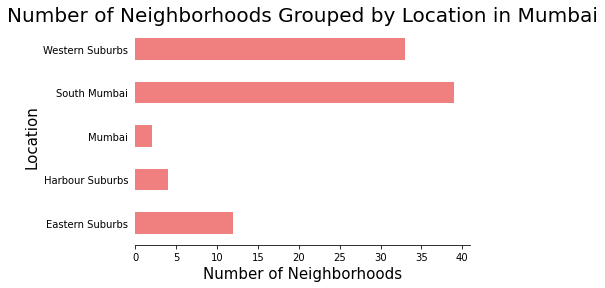

In [16]:
fig = plt.figure(figsize=(12,8))
%matplotlib inline
ax = neighborhoods_mumbai.plot(kind='barh', color='lightcoral')
ax.set_title('Number of Neighborhoods Grouped by Location in Mumbai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)
fig.tight_layout()

Clearly we can see that South Mumbai and Western Suburbs have the most number of neighborhoods. Notice how we see one of the locations as Mumbai itself? This is because the neighborhoods contained in this location are located at the outskirts of Mumbai and thus have been grouped as just Mumbai.

Now lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Mumbai using GeoPy.

In [17]:
address = 'Mumbai, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

ConfigurationError: Using Nominatim with default or sample `user_agent` "geopy/2.2.0" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.

In [18]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum

Using Foursquare API
Now we can start working with the Foursquare API to obtain venue recommendations.

Lets create the Foursquare credentials first.

In [19]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.84644000000003 longitude


Generalizing Foursquare API
Now that we have seen how the API call works and how we can clean our data to get relevant information, we can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Clustering neighborhoods
Now we can use KMeans clustering method to cluster the neighborhoods.

First we need to determine how many clusters to use. This will be done using the Silhouette Score.

We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [24]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [25]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

NameError: name 'mum_grouped' is not defined